## Import Liberaries  

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from sklearn.preprocessing import StandardScaler
import librosa.display
import seaborn as sns
import pandas as pd


## MFCC extraction function

#### Explanation

    librosa.load: Loads an audio file and returns the waveform (y) and sampling rate (sr).
    librosa.feature.mfcc: Computes the MFCC features.
        y: The audio time series.
        sr: Sampling rate.
        n_mfcc: Number of MFCC coefficients to extract (default is 13, you can increase if needed).
    .npy: Saves the extracted MFCC features in a binary file format using numpy.save.
    
#### Log Mel Spectrogram Calculation

    After loading the audio file, we calculate the Mel spectrogram using librosa.feature.melspectrogram().
    We then convert the Mel spectrogram to a log scale using librosa.power_to_db(). This helps visualize the spectral energy in decibels, making it easier to interpret.
    
#### Visualization

    The librosa.display.specshow() method is used to plot the log Mel spectrogram.
    The plot is labeled with the Mel frequency axis (y_axis='mel') and the time axis (x_axis='time').
    The colorbar is displayed with decibel values.
    
#### Saving Features in a CSV File

    Convert MFCC Features to a Pandas DataFrame and save it as CSV file

#### What Happens When You Run the Code

    The code will process each audio file in the audio_folder directory.
    For each file:
        It will extract MFCC features and save them as .npy files.
        It will compute the log Mel spectrogram and display the plot.
        
#### Customizations

    Adjust the number of MFCC coefficients with n_mfcc.
    You can normalize or preprocess audio files further if required.

In [2]:
def extract_mfcc_features(audio_folder, save_folder, n_mfcc=13):
    """
    Extracts MFCC features from all audio files in a given folder and saves them as .npy files.
    
    Parameters:
    - audio_folder (str): Path to the folder containing audio files.
    - save_folder (str): Path to the folder to save extracted MFCC features.
    - n_mfcc (int): Number of MFCC features to extract.
    """
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    mfcc_data = []  # To store MFCC for all files
    combined_mfcc = None  # To store concatenated MFCC data
    for file_name in os.listdir(audio_folder):
        if file_name.endswith(('.wav', '.mp3')):  # Add other formats if needed
            audio_path = os.path.join(audio_folder, file_name)
            try:
                # Load the audio file
                y, sr = librosa.load(audio_path, sr=None)

                # Extract MFCC features
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

                # Create a directory to save audio data
                if not os.path.exists(save_folder+file_name):
                    os.mkdir(save_folder+file_name)
                
                
                # Save MFCC features as .npy file
                save_path = os.path.join(save_folder+file_name, "mfcc.npy")
                np.save(save_path, mfcc)

                # Append MFCC and file info
                mfcc_data.append({"file_path": save_path, "mfcc": mfcc})
                combined_mfcc = mfcc if combined_mfcc is None else np.hstack((combined_mfcc, mfcc))

                # Save MFCC features as .png file
                save_path = os.path.join(save_folder+file_name, "mfcc.png")
                
                # Calculate Mel Spectrogram
                mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

                # Convert Mel Spectrogram to log scale (decibels)
                log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

                # Visualize the Log Mel Spectrogram
                plt.figure(figsize=(10, 4))
                librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
                plt.colorbar(format='%+2.0f dB')
                plt.title(f'Log-scaled Mel Spectrogram of {file_name}')
                plt.tight_layout()
                plt.savefig(save_path)
                plt.close()

                # Save MFCC features as .csv file
                save_path = os.path.join(save_folder+file_name, "mfcc.csv")
                
                # Convert MFCC features to a pandas DataFrame
                df = pd.DataFrame(mfcc.T)  # Transpose to make MFCC features as columns

                # Save MFCC features as CSV
                save_path = os.path.join(save_path)
                df.to_csv(save_path, index=False)
                
                print(f"Extracted MFCC for {file_name} and saved to {save_folder}{file_name}/")

            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    # Save combined MFCC data in a global file to use it in the features
    if combined_mfcc is not None:
        np.save('data/ar/result/mfcc.npy', combined_mfcc)
        print(f"Combined MFCC data saved to {'data/ar/result/mfcc.npy'}")
    else:
        print("No audio files found or processed!")



## Initialize Data set path
### Visualizing Dataset Statistics
#### Calculate Audio Durations for each file
#### Plot the Histogram

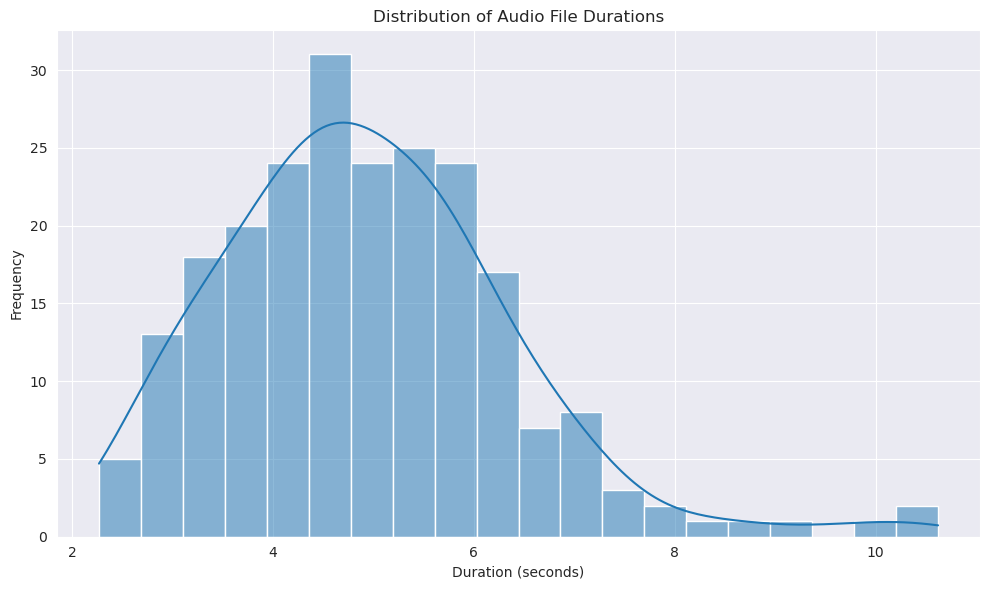

In [3]:
audio_folder = "data/ar/clips/"      # Data set path
save_folder = "data/ar/result/"       # Path to save MFCC features
durations = []

# Iterate over all audio files and calculate their duration
for file_name in os.listdir(audio_folder):
    if file_name.endswith(('.wav', '.mp3')):
        audio_path = os.path.join(audio_folder, file_name)
        try:
            y, sr = librosa.load(audio_path, sr=None)
            duration = librosa.get_duration(y=y, sr=sr)
            durations.append(duration)
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Plotting and saving the distribution of audio file durations
plt.figure(figsize=(10, 6))
sns.histplot(durations, bins=20, kde=True)
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig(save_folder + "durations_Statistics.png")
plt.close()

## MFCC
#### Call MFCC extraction for and aplay it to all of the clips clip

In [4]:
extract_mfcc_features(audio_folder, save_folder)

Extracted MFCC for common_voice_ar_41100172.mp3 and saved to data/ar/result/common_voice_ar_41100172.mp3/
Extracted MFCC for common_voice_ar_41108353.mp3 and saved to data/ar/result/common_voice_ar_41108353.mp3/
Extracted MFCC for common_voice_ar_41108364.mp3 and saved to data/ar/result/common_voice_ar_41108364.mp3/
Extracted MFCC for common_voice_ar_41145462.mp3 and saved to data/ar/result/common_voice_ar_41145462.mp3/
Extracted MFCC for common_voice_ar_41145463.mp3 and saved to data/ar/result/common_voice_ar_41145463.mp3/
Extracted MFCC for common_voice_ar_41145464.mp3 and saved to data/ar/result/common_voice_ar_41145464.mp3/
Extracted MFCC for common_voice_ar_41184496.mp3 and saved to data/ar/result/common_voice_ar_41184496.mp3/
Extracted MFCC for common_voice_ar_41184497.mp3 and saved to data/ar/result/common_voice_ar_41184497.mp3/
Extracted MFCC for common_voice_ar_41184498.mp3 and saved to data/ar/result/common_voice_ar_41184498.mp3/
Extracted MFCC for common_voice_ar_41184499.mp

## visualize the MFCC features for all audio files

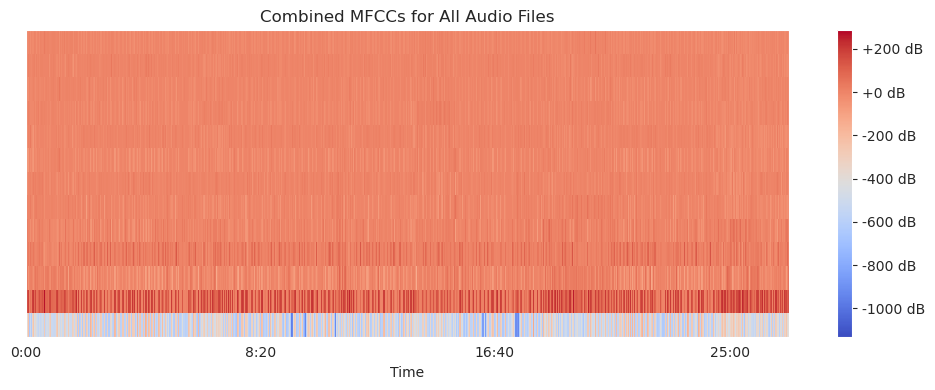

In [5]:
# Plotting and saving combined MFCC data 
mfcc = np.load('data/ar/result/mfcc.npy')   #load combined MFCC data
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.title('Combined MFCCs for All Audio Files')
plt.tight_layout()
plt.show()
plt.savefig(save_folder+"/mfcc.png")
plt.close()

## Feature Scaling and Normalization
#### Normalize the MFCC features for consistency and to prepare them for machine learning or deep learning models.

In [6]:
# Normalize MFCC features
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc)